# Supervised Learning: Programming Practice

COSC 410: Applied Machine Learning\
Colgate University\
*Prof. Apthorpe*

## Overview

This notebook will give you some practice with the following fundamentals of supervised learning:
  1. Importing a dataset
  2. Train/Test Split
  3. Preprocessing: Standardization
  4. Model Selection
  5. Cross-Validation
  6. Hyperparameter Tuning
  7. Test Set Evaluation
     
We will be working with the Iris Flower Dataset, a famous dataset from 1936 that is often used for practice ML programming. According to Wikipedia, "The data set consists of **50 samples** from each of **three species** of Iris (Iris setosa, Iris virginica and Iris versicolor \[shown in order below\]). **Four features** were measured from each sample: *the length and the width of the sepals and petals, in centimeters*." The goal is to train a **multiclass** classifier that can predict the species of an Iris if given these measurements.


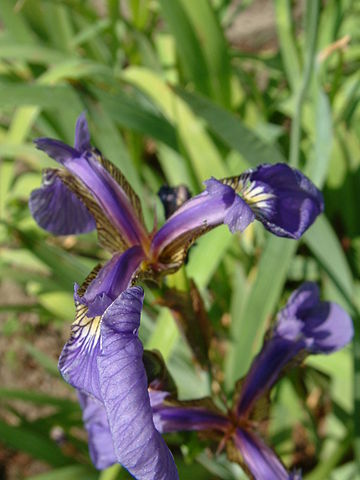  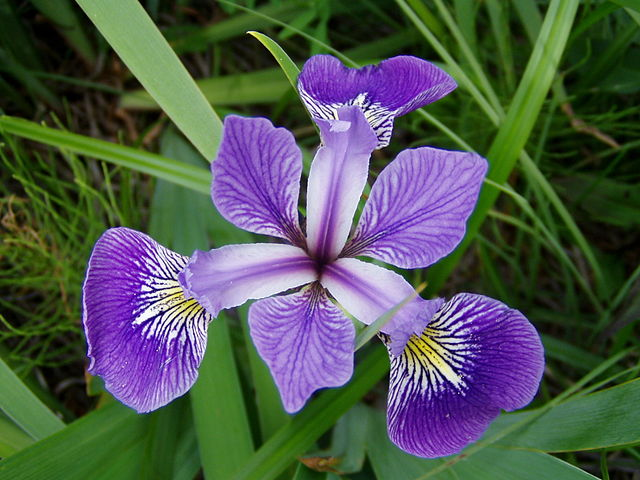 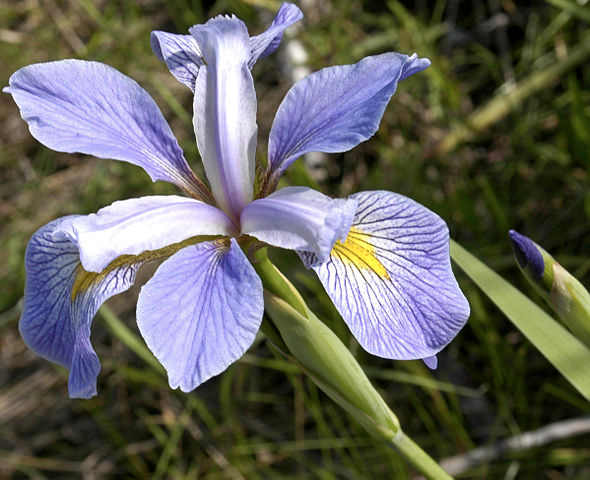
     

## 1. Importing the Dataset

The Iris dataset is very small and can be loaded directly from Scikit-Learn

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.metrics

ModuleNotFoundError: No module named 'numpy'

In [2]:
# Load dataset
iris = sklearn.datasets.load_iris()

# Separate labels y from the features/attributes X. Note that X and y are NumPy arrays and NOT Pandas dataframes
# Y represents labels
X = iris.data
y = iris.target

Now that you've loaded the data, you should do some basic inspection to make sure it matches your expectations.

In [3]:
# Print the shape (# rows, # col) of the data X
X.shape

(150, 4)

In [5]:
# Print the shape of the labels y
y.shape

(150,)

**DISCUSSION:** Think about the description of the dataset above and explain why these shapes make sense

## 2. Train/Test Split

The next step is to divide the data into a training set and a test set. You could do this with a shuffle and [] indexing, but here we will use a built-in Scikit-Learn function. The function documentation is here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html. Note that train_test_split() shuffles the data by default.

Divide the data into 80% training and 20% test.

In [6]:
# Divide data/labels into train/test sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

# print shapes of train/test sets for sanity
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


Now that we have divided the data, we will ensure that the test set does not affect anything in the training process.

## 3. Preprocessing: Standardization
Most shallow ML models work best if the data is standardized such that every feature is scaled to have a mean of 0 and a variance of 1. We will use sckit-learn's StandardScalar class to perform this preprocessing step. 

In [ ]:
# Create a StandardScaler object

# Use the .fit method on the *training* data so the object knows what transformation is needed

# Use the .transform method to scale both the training set and the test set

## 4. Model Selection

Before we can go any further, we need to choose a model to use for our classifier. Since we haven't talked about any models yet in class, we will just choose 2 arbitrarily and treat them like black boxes for this exercise. We will use a decision tree classifer and a support vector machine (a.k.a. suport vector classifier). 

In [ ]:
# Import the models


# Initialize


Both models provide many hyperparameter options that can be set in their contructor. We will use the defaults for now, but the documentation is here if you are curious: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html and https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

## 5. Cross-Validation

Scikit-Learn provides a few ways to implement cross-validation. 

### 5.1. All-in-one Function
The high-level `cross_val_score()` function allows you to perform a full multi-fold cross-validation with a single function call. The following cell demonstrates this method for a 5-fold cross-validation. The documentation for `cross_val_score()` is here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Run 5-fold cross-validation with both classifiers.

In [ ]:
# 5-fold cross validation with decision tree classifier


# 5-fold cross-validation with support vector machine 


The `cross_val_score()` function returns the prediction **accuracy** on the validation set used in each fold (athough you can choose a different scoring metric using the `scoring` keyword argument if desired). 

Now print the scores for each fold and compute the average accuracy for each model.

In [ ]:
# Print decision tree scores and average


# Print SVM scores and average


**DISCUSSION:** Why is accuracy an OK choice of scoring metric for this classification problem?

### 5.2. Custom Cross-Validation
While the `cross_val_score()` function is convenient, it does not allow you to do detailed inspection of validation set results that may be necessary to understand and improve your models. 

Another way to perform cross validation with Scikit-Learn is to write a loop to handle each fold. This is demonstrated below with a 5-fold stratified cross-validation. "Stratified" means that each fold is sampled to contain the same ratio of examples from each class (in this case, species of Iris). The documentation for `StratifiedKFold` is here if you are curious: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html. 

Complete the code below to create a complete machine learning pipeline with stratified cross-validation.

**DISCUSSION:** Why might stratified sampling produce better performance measurements than random sampling?

In [ ]:
# Create object specifying cross-validation parameters, including number of folds


# Accumulator variables for tracking scores


# Loop over cross-validation folds

    
    # Get training set for this fold

    
    # Get validation set for this fold

    
    # Initialize the models

    
    # Train the models 
    # Note that .fit() takes the training data as the first argument and the training labels as the second argument

    
    # Run the model to predict the labels of the validation set
    # Note that .predict() takes the data for which we want to predict labels as the only argument
    
    # Compute the accuracy 
    # Note that .accuracy_score() takes the correct labels as the first argument and the predicted labels as the second argument 

    
    # Store accuracies

    
# Print results
        

These accuracies should be the same as before. The benefit of this much more verbose method is that you can create intermediate plots, tracking more information about each fold, and generally have more control over the pipeline. 

Each of the `sklearn` functions used here have many default keyword arguments that can be changed for specific circumstances. While the default options are often the best, it is always worth skimming the documentation for each function when you use it to be aware of the parameters you can set.

## 6. Model Tuning

Now that you have some preliminary accuracy scores for your models, it's time to see whether we can improve those scores by tuning the model hyperparameters. Model-specific hyperparameters are listed in the documentation for each model. Let's focus on the SVM for now. For starters, let's try changing the *kernel* of the support vector machine (how the model represents the data in Euclidean space - more about this in a few weeks). The SVC class has several options for kernels, so in the spirit of brute force, let's just try them all!

In [ ]:
# kernel types


# Accumulator for average cross-validation accuracies for each kernel


# Loop over each kernel

    
    # initialize the SVM with the current kernel

    
    # run the 5-fold cross-validation using the cross_val_score() function (see above)

    
    # save the average accuracy score


Since all good data deserves a good visualization, let's plot the comparison

In [ ]:
# Plot accuracies for different kernels


It looks like the linear kernel is the best, but is very close to the radial basis function (RBF) kernel.

If this were a real ML project, we would continue iterating to improve the cross-validation performance as much as possible. For now though, we'll move on to the final performance evaluation

## 7. Test Set Evaluation

Now that we're done designing our model, we can do the final training with the full training set and test the performance on the test set. 

In [ ]:
# Initialize model with best hypermaters settings


# Train the model on the full training set


# Predict the labels of the test set


# Compute the test accuracy


**DISCUSSION**: Have we created the perfect Iris classifier? Is this too good to be true?

## Final Discussion
1. Why do some ML practicioners decide **NOT** to use a separate test set, instead using the entire dataset for cross-validation and reporting the average cross-validation performance as their final result?